In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

In [102]:
df = pd.read_csv('formatted_flights.csv', index_col=0)
df.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


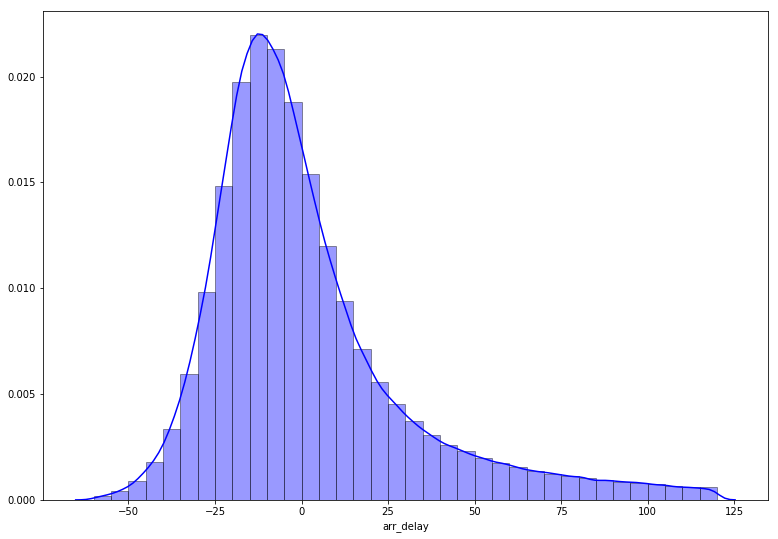

In [91]:
ax, fig = plt.subplots(figsize=(13,9))
sns.distplot(df.arr_delay, hist=True, 
             kde=True, bins=int(180/5),color='blue', 
             hist_kws={'edgecolor':'black'})

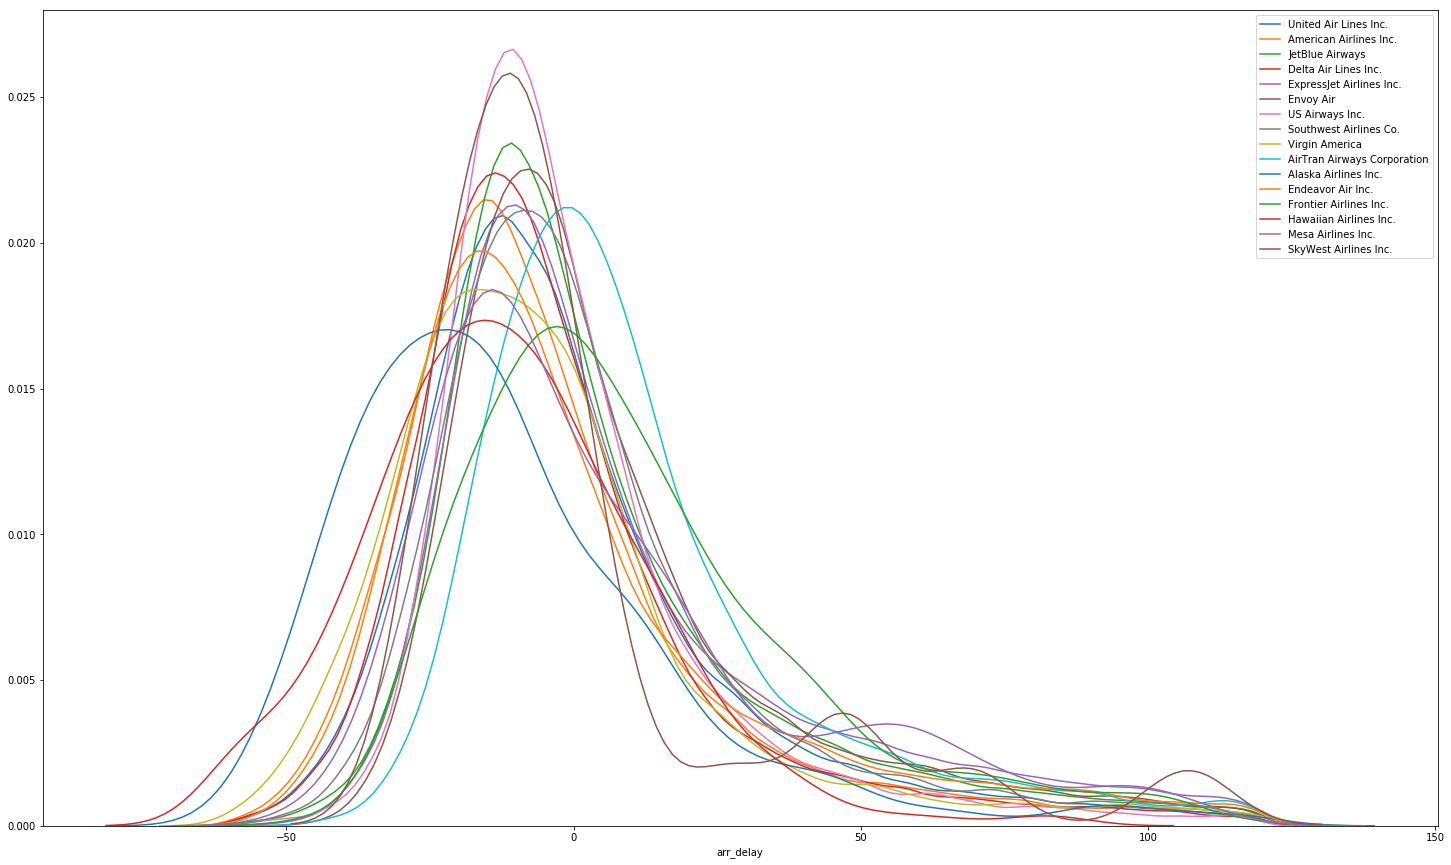

In [93]:
ax, fig = plt.subplots(figsize=(25,15))
for flight in df.name.unique():
    sns.distplot(df[df.name == flight].arr_delay, hist=False ,kde=True,label=flight)
# sns.legend()

looking at the data, we would want alaska airlines or haiiwan airlines

now the test for the central limit theorem the 4 things are:

 1. The sampling dist of the mean will be less spread than the values in the population from which the sample is drawn

 2. The sampling dist will be well-modeled by a normal dist.

 3. The spread of the sampling dist. is related to the spread of the population values $\mu_{sampling} = \mu_{population}$, $\sigma_{sampling} = \frac{\sigma_{population}}{ \sqrt{n}}$
 4. Bigger samples lead to a smaller spread in the sampling dist

In [98]:
# first create different samples, params: n samples of m size
def sample(df, n:int, m:int):
    samples = []
    for i in range(n): 
        samples.append(df.sample(m))
    return samples
m = 200
n = 500
samples = sample(df,n,m)
means = [np.mean(x.arr_delay) for x in samples]
stds = [np.std(x.arr_delay) for x in samples]

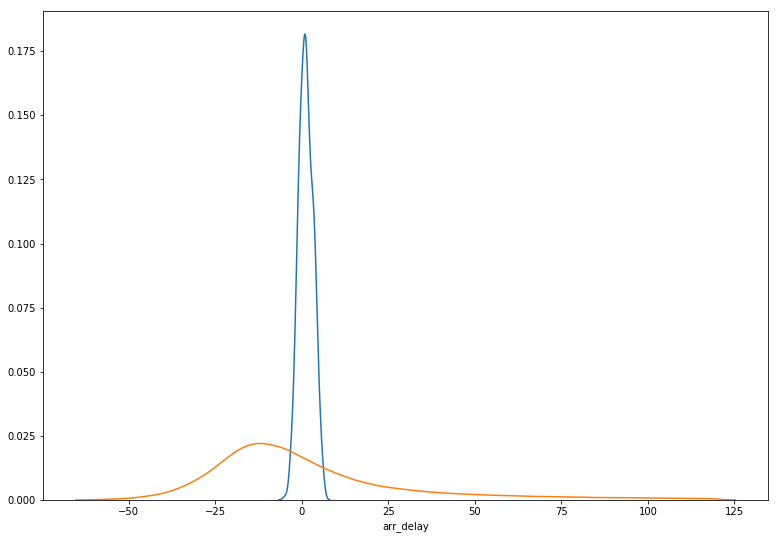

In [99]:
# 1. here we see that the sampling dist of the mean has less spread
ax, fig = plt.subplots(figsize=(13,9))
sns.distplot(means, kde=True,hist=False)
sns.distplot(df.arr_delay,kde=True,hist=False)

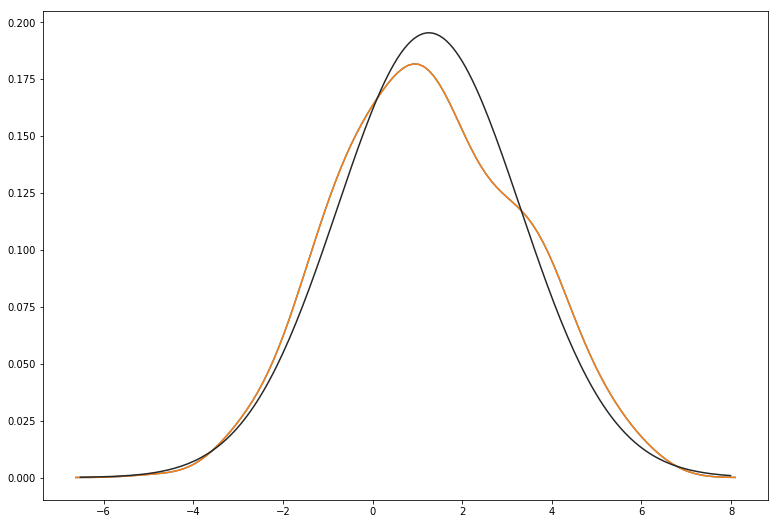

In [100]:
# 2. we see that a it fits a normal distribution
ax, fig = plt.subplots(figsize=(13,9))
sns.distplot(means,kde=True,hist=False)
sns.distplot(means,hist=False,fit=norm)

In [101]:
# 3. first check mu_sampling = m_pop, then the sigma
print("mu_means = {:.2f}, mu_pop = {:.2f}".format(np.mean(means),np.mean(df.arr_delay)))
# now check for the sigma:
print("std_means = {:.2f}, std_pop = {:.2f}".format(np.std(means),np.std(df.arr_delay)))
print("sqrt(m) = {:.2f}, std_pop/std_means = {:.2f}".format(np.sqrt(m),(np.std(df.arr_delay)/np.std(means))))

mu_means = 1.26, mu_pop = 1.30
std_means = 2.04, std_pop = 29.06
sqrt(m) = 14.14, std_pop/std_means = 14.24


In [84]:
# 4. the formula above